In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from warnings import filterwarnings

filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/Attrition data.csv")

In [ ]:
df1 = df.select_dtypes('object')
df1

Attrition     BusinessTravel              Department EducationField  \
0          Yes      Travel_Rarely                   Sales  Life Sciences   
1           No  Travel_Frequently  Research & Development  Life Sciences   
2          Yes      Travel_Rarely  Research & Development          Other   
3           No  Travel_Frequently  Research & Development  Life Sciences   
4           No      Travel_Rarely  Research & Development        Medical   
...        ...                ...                     ...            ...   
1465        No  Travel_Frequently  Research & Development        Medical   
1466        No      Travel_Rarely  Research & Development        Medical   
1467        No      Travel_Rarely  Research & Development  Life Sciences   
1468        No  Travel_Frequently                   Sales        Medical   
1469        No      Travel_Rarely  Research & Development        Medical   

      Gender                    JobRole MaritalStatus Over18 OverTime  
0     Female            Sales Executive        Single      Y      Yes  
1       Male         Research Scientist       Married      Y       No  
2       Male      Laboratory Technician        Single      Y      Yes  
3     Female         Research Scientist       Married      Y      Yes  
4       Male      Laboratory Technician       Married      Y       No  
...      ...                        ...           ...    ...      ...  
1465    Male      Laboratory Technician       Married      Y       No  
1466    Male  Healthcare Representative       Married      Y       No  
1467    Male     Manufacturing Director       Married      Y      Yes  
1468    Male            Sales Executive       Married      Y       No  
1469    Male      Laboratory Technician       Married      Y       No  

[1470 rows x 9 columns]

In [ ]:
df2 = df.select_dtypes('int64')
df2

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
...   ...        ...               ...        ...            ...   
1465   36        884                23          2              1   
1466   39        613                 6          1              1   
1467   27        155                 4          3              1   
1468   49       1023                 2          3              1   
1469   34        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
1465            2061                        3          41               4   
1466            2062                        4          42               2   
1467            2064                        2          87               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      JobLevel  ...  RelationshipSatisfaction  StandardHours  \
0            2  ...                         1             80   
1            2  ...                         4             80   
2            1  ...                         2             80   
3            1  ...                         3             80   
4            1  ...                         4             80   
...        ...  ...                       ...            ...   
1465         2  ...                         3             80   
1466         3  ...                         1             80   
1467         2  ...                         2             80   
1468         2  ...                         4             80   
1469         2  ...                         1             80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   1               6                   4   
1                   3              10                   7   
2                   3               0                   0   
3                   3               8                   7   
4                   3               2                   2   
...               ...             ...                 ...   
1465                3               5                   2   
1466                3               7                   7   
1467                3               6                   2   
1468                2               9                   6   
1469   

In [ ]:
df1.describe().T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054

In [ ]:
df.describe(include='int64').T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [ ]:
df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

In [ ]:
# to separate categorical and numerical columns
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
for i in cat:
    print('Unique values of ', i, set(df[i]))

Unique values of  Attrition {'Yes', 'No'}
Unique values of  BusinessTravel {'Non-Travel', 'Travel_Rarely', 'Travel_Frequently'}
Unique values of  Department {'Human Resources', 'Research & Development', 'Sales'}
Unique values of  EducationField {'Technical Degree', 'Other', 'Medical', 'Life Sciences', 'Marketing', 'Human Resources'}
Unique values of  Gender {'Male', 'Female'}
Unique values of  JobRole {'Manufacturing Director', 'Sales Representative', 'Laboratory Technician', 'Research Director', 'Sales Executive', 'Research Scientist', 'Manager', 'Human Resources', 'Healthcare Representative'}
Unique values of  MaritalStatus {'Married', 'Single', 'Divorced'}
Unique values of  OverTime {'Yes', 'No'}


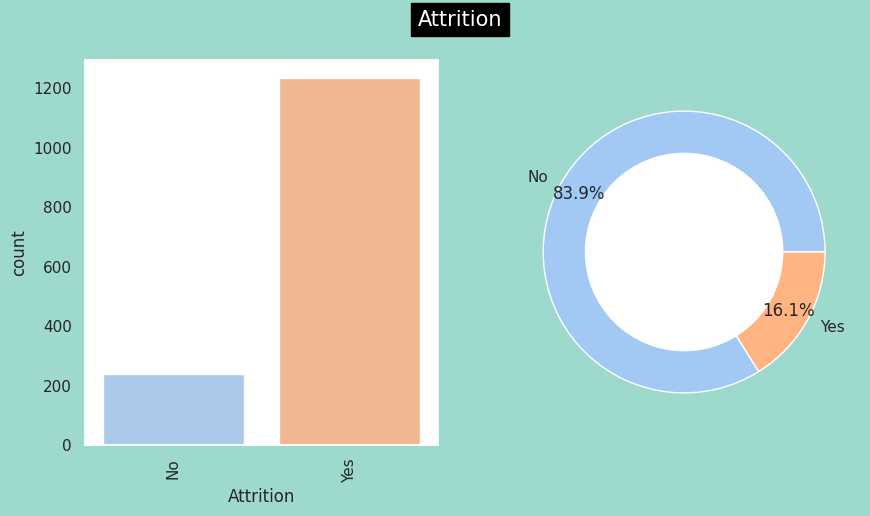

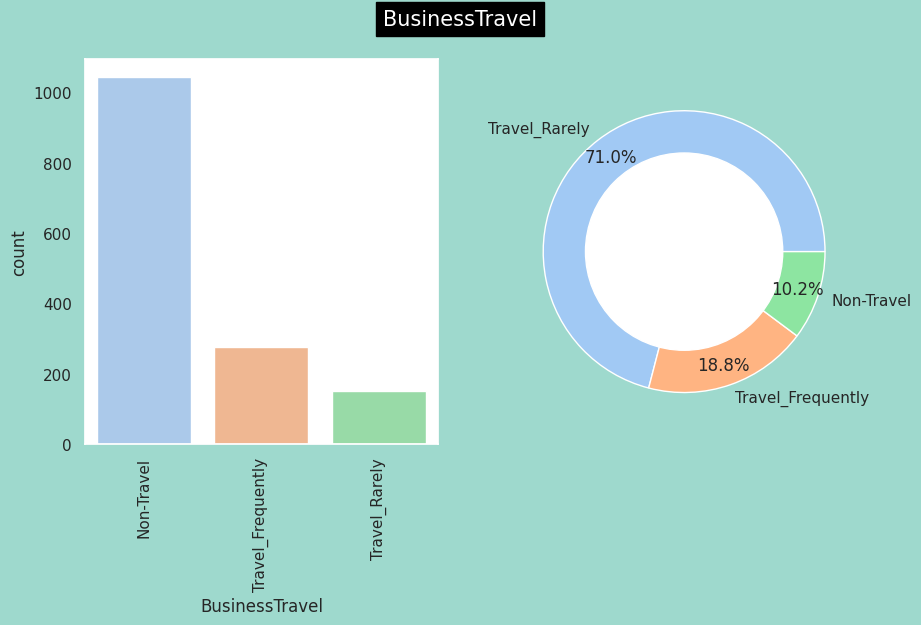

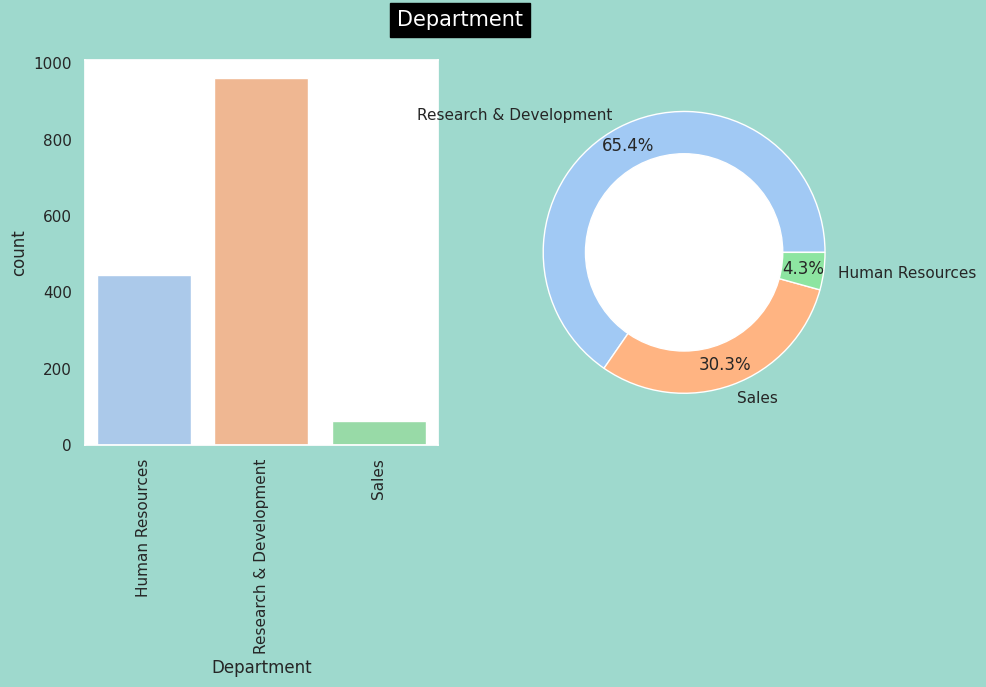

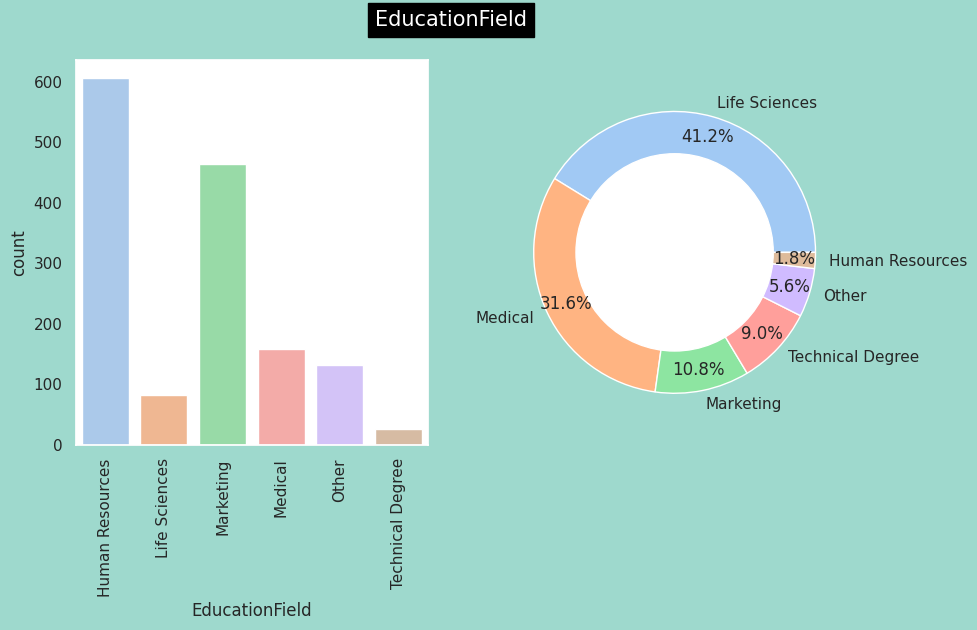

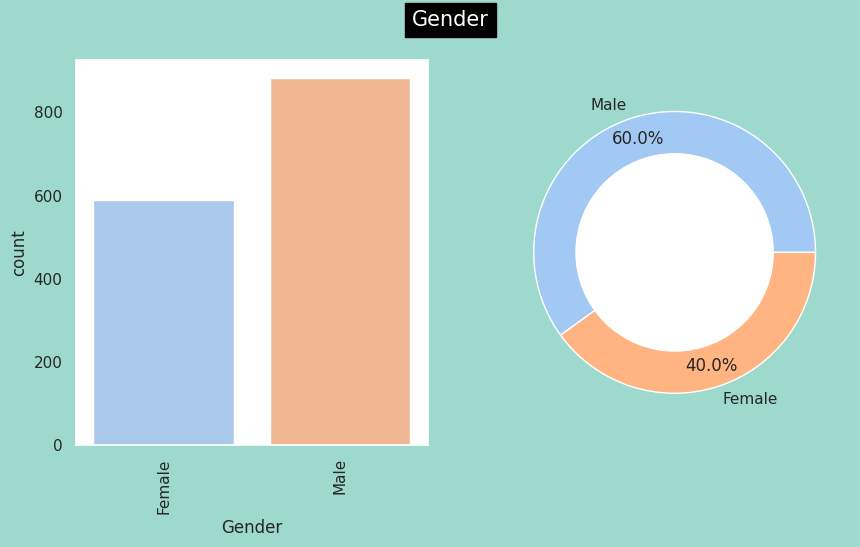

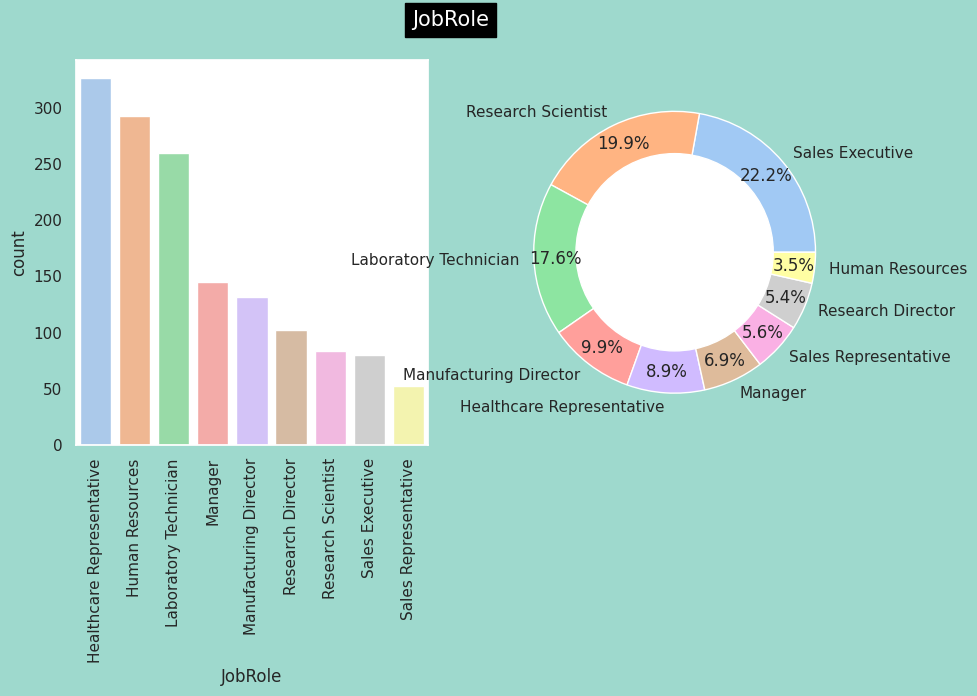

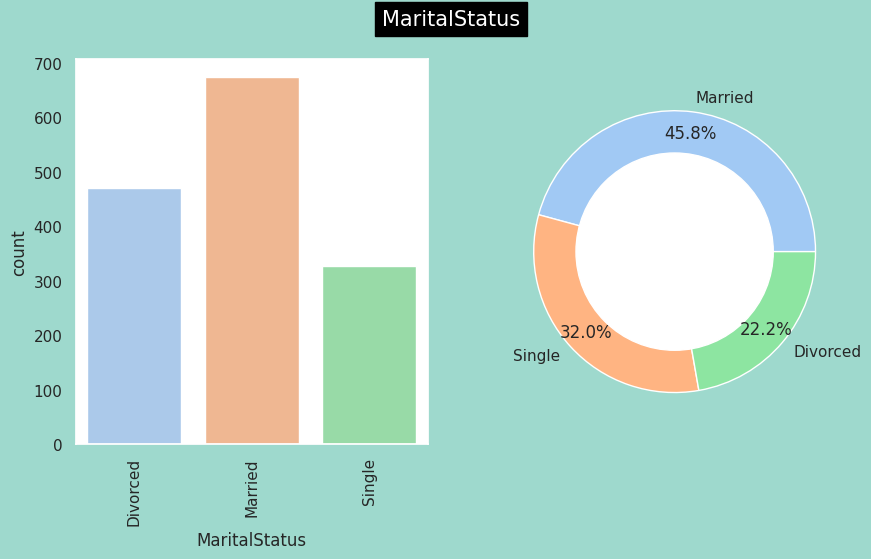

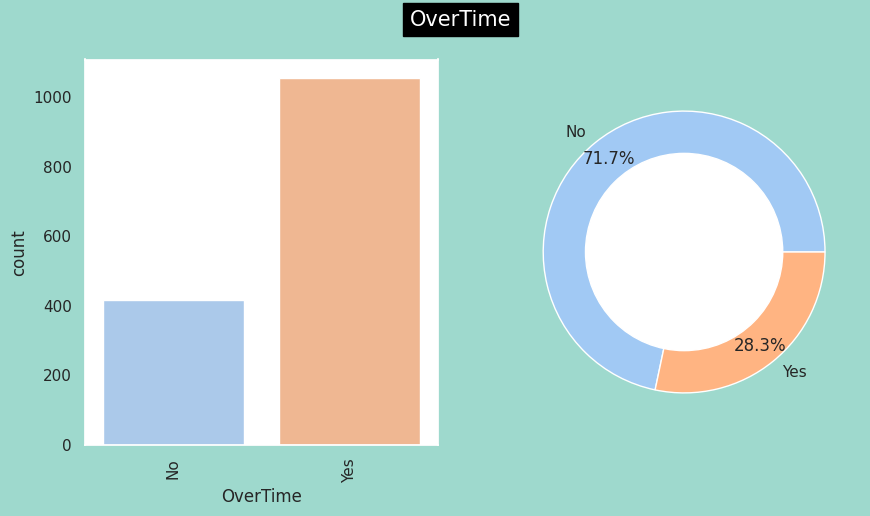

In [ ]:
# univariate analysis of categorical data:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"#9ed9cd"})
sns.set_palette("pastel")
for i, col in enumerate(cat):

    fig, axes = plt.subplots(1,2,figsize=(10,5))

    # count of col (countplot)

    ax=sns.countplot(data=df, x=col, ax=axes[0])
    activities = [var for var in df[col].value_counts().sort_index().index]
    ax.set_xticklabels(activities,rotation=90)
    for container in axes[0].containers:
        axes[0]
    #count of col (pie chart)

    index = df[col].value_counts().index
    size = df[col].value_counts().values
    explode = (0.05, 0.05)

    axes[1].pie(size, labels=index,autopct='%1.1f%%', pctdistance=0.85)

    # Inner circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.suptitle(col,backgroundcolor='black',color='white',fontsize=15)

    plt.show()

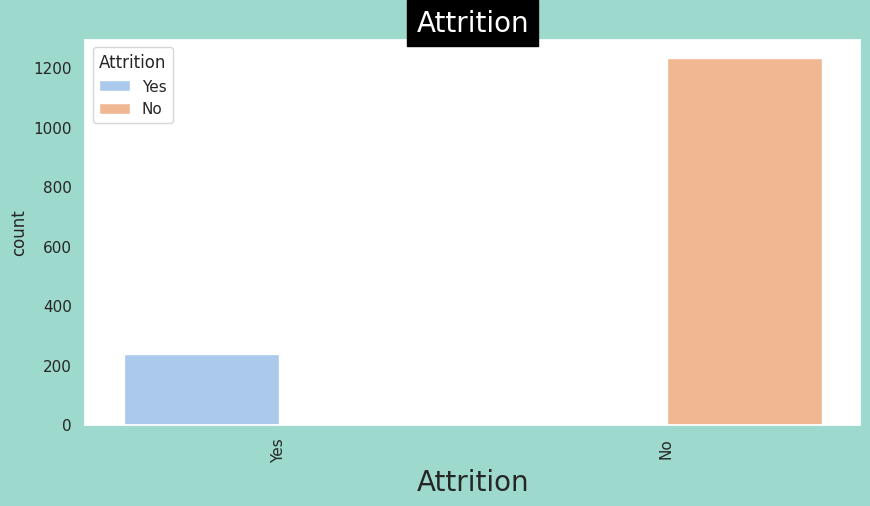

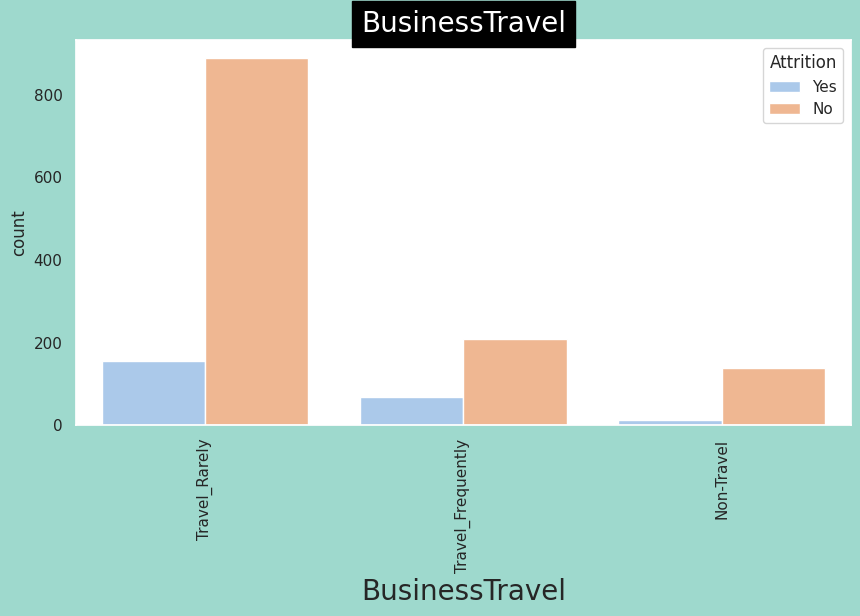

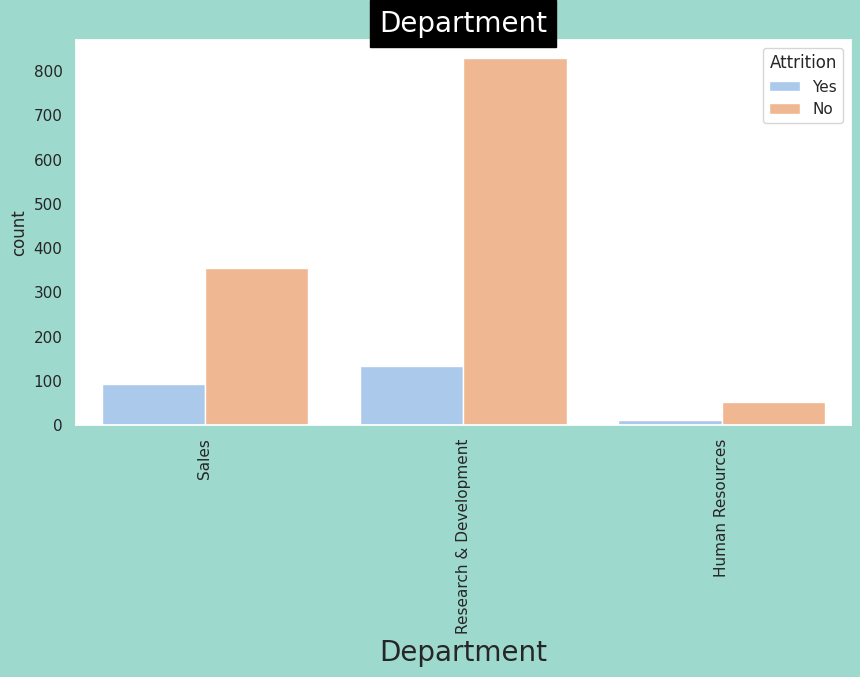

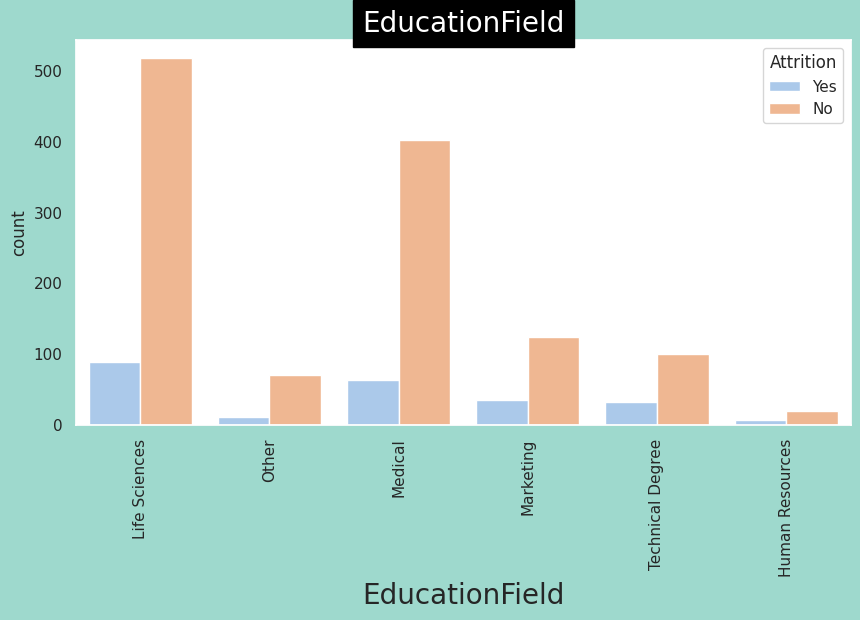

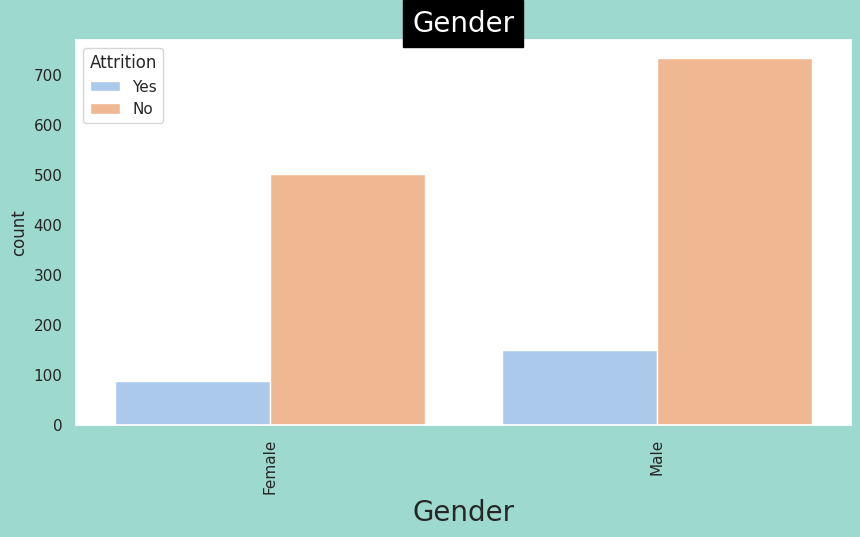

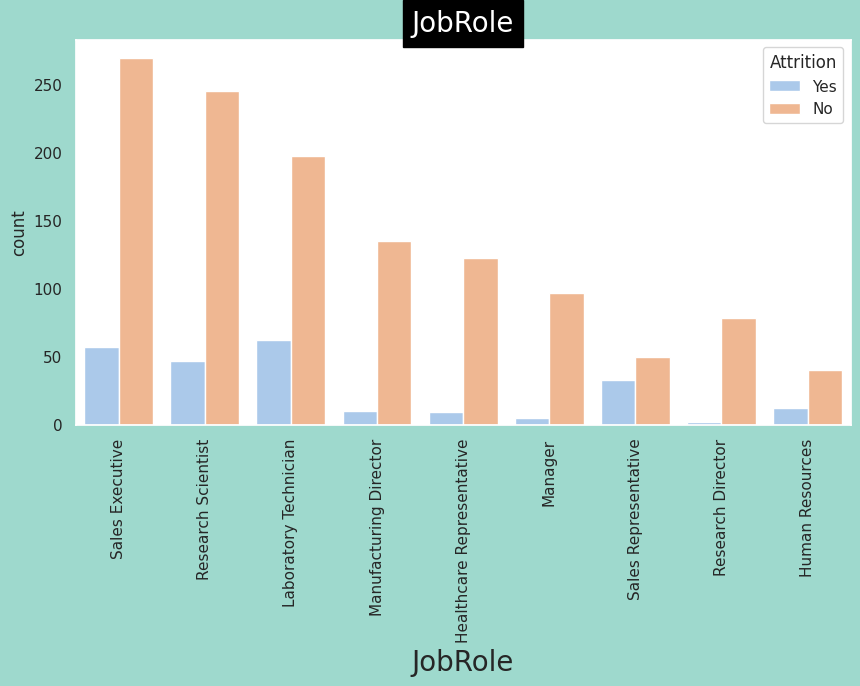

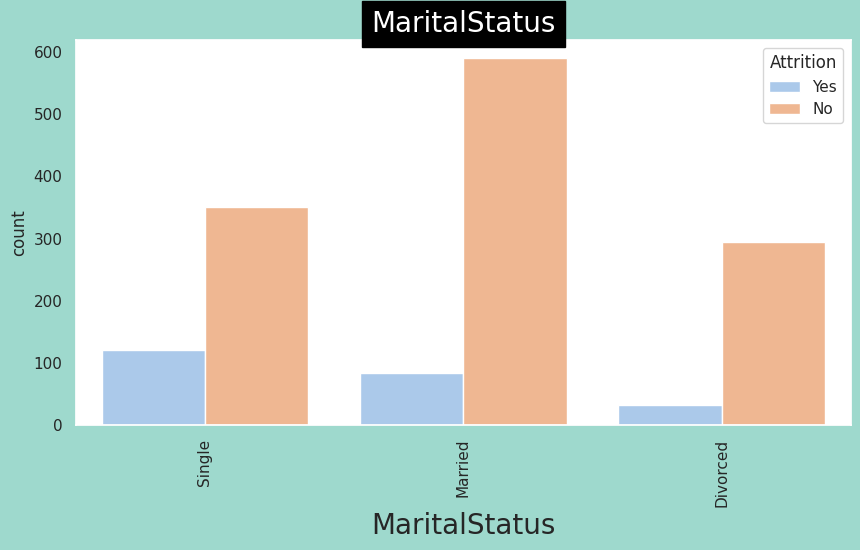

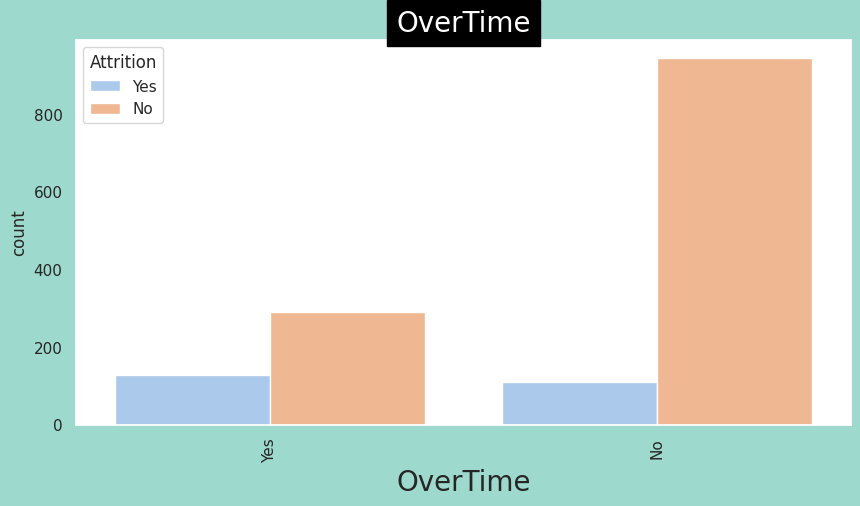

In [ ]:
for column in cat :
    plt.figure(figsize=(10,5))

    ax=sns.countplot(x=df[column], data=df,hue="Attrition")
    for container in ax.containers:
        ax
    plt.title(column,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()

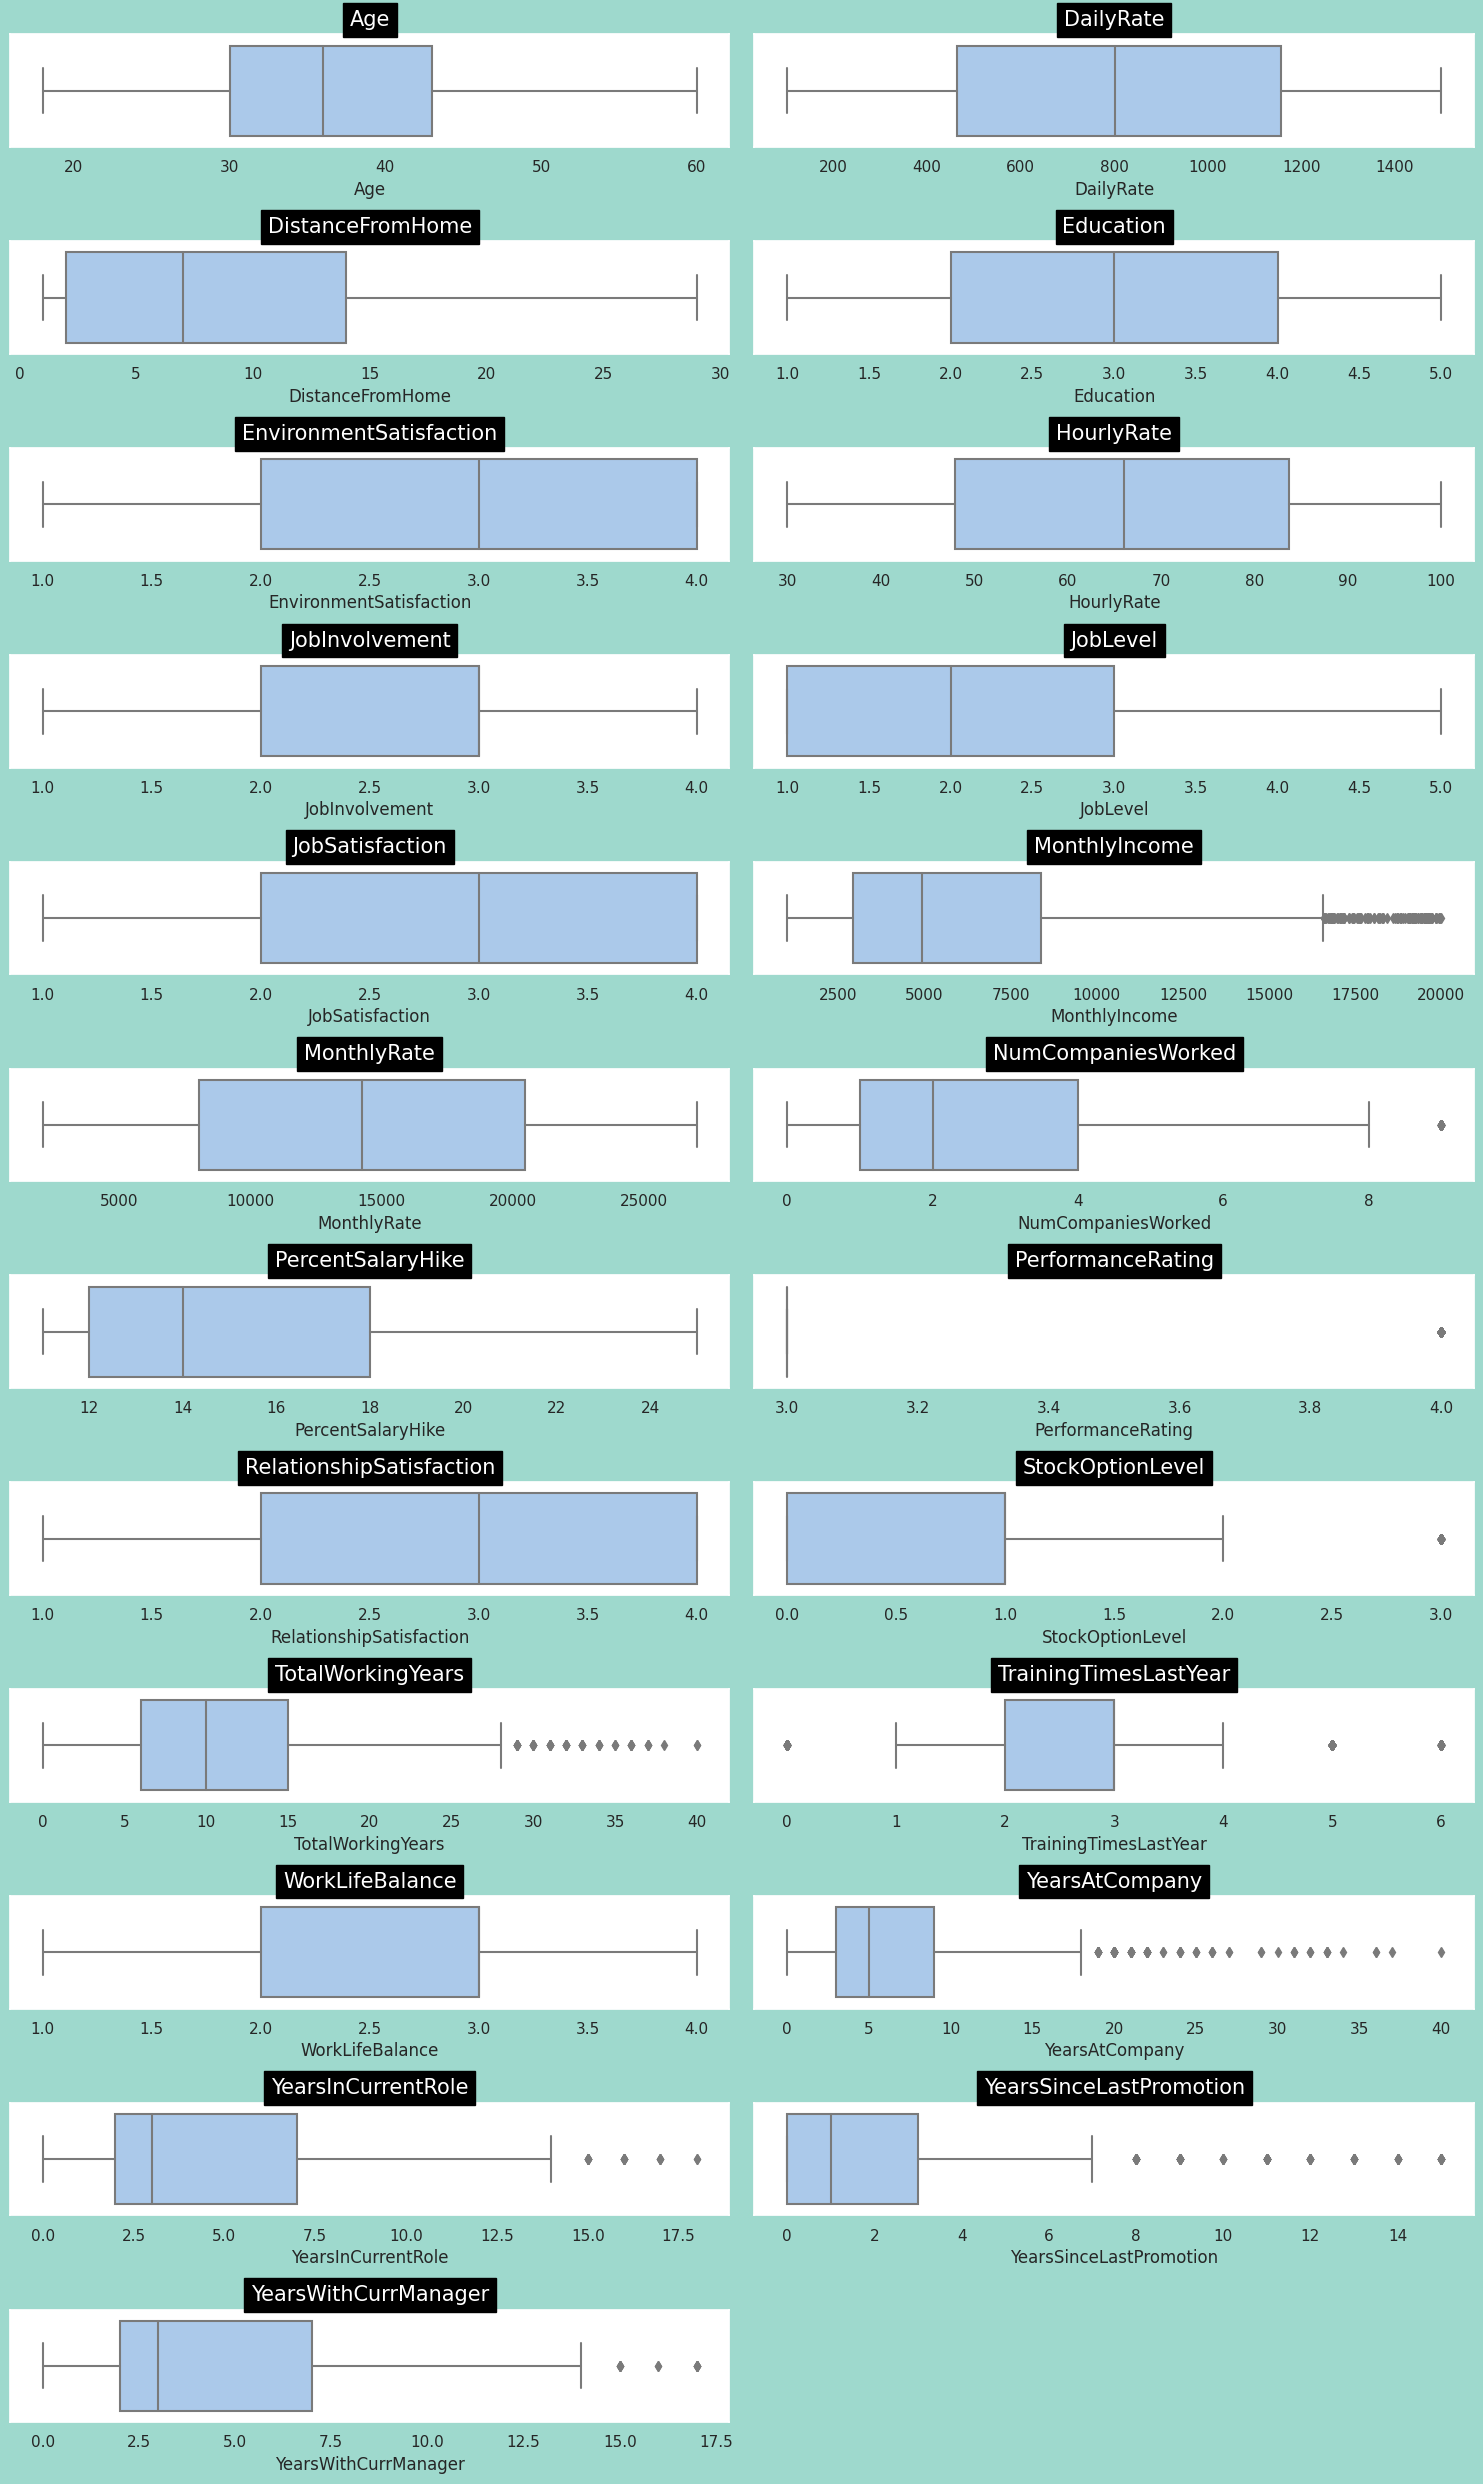

In [ ]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

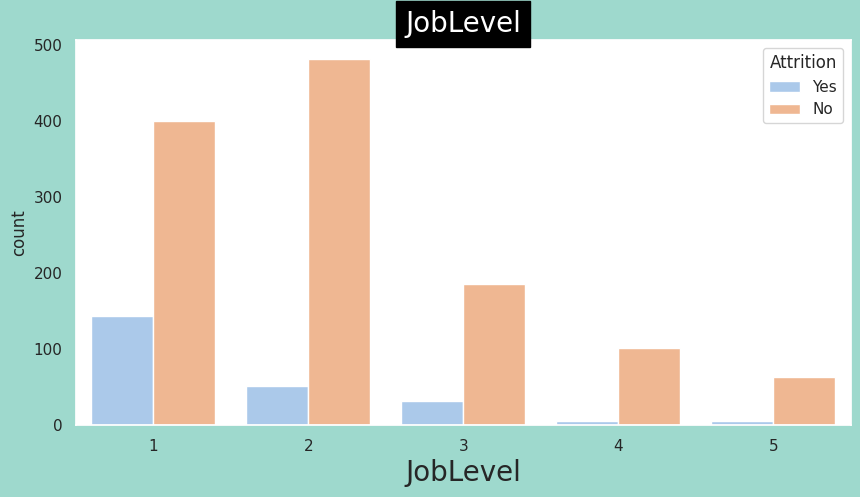

In [ ]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x=df['JobLevel'], data=df,hue="Attrition")
for container in ax.containers:
        ax
plt.title('JobLevel',backgroundcolor='black',color='white',fontsize=20)
plt.xlabel('JobLevel',fontsize=20)
plt.grid()
plt.show()

<Figure size 500x1000 with 0 Axes>

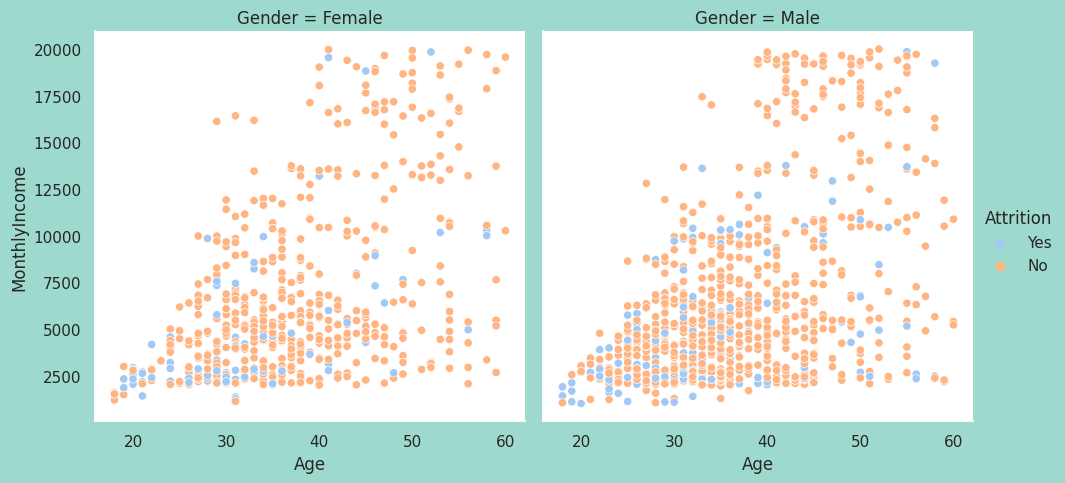

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

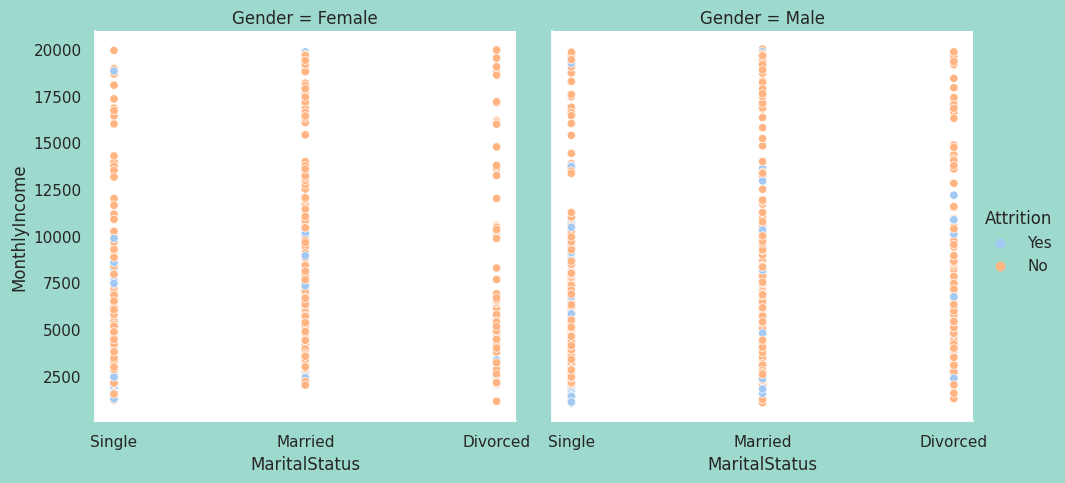

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="MaritalStatus", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

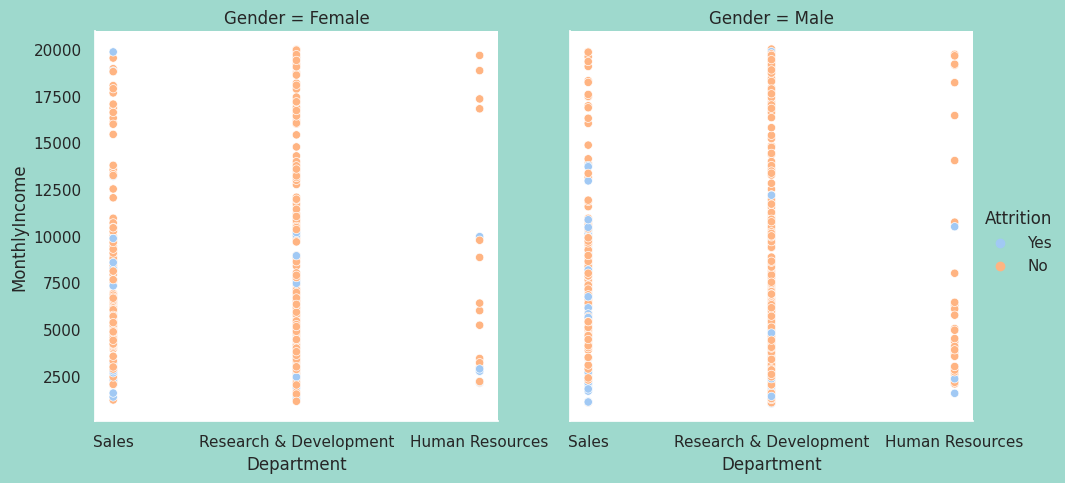

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Department", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

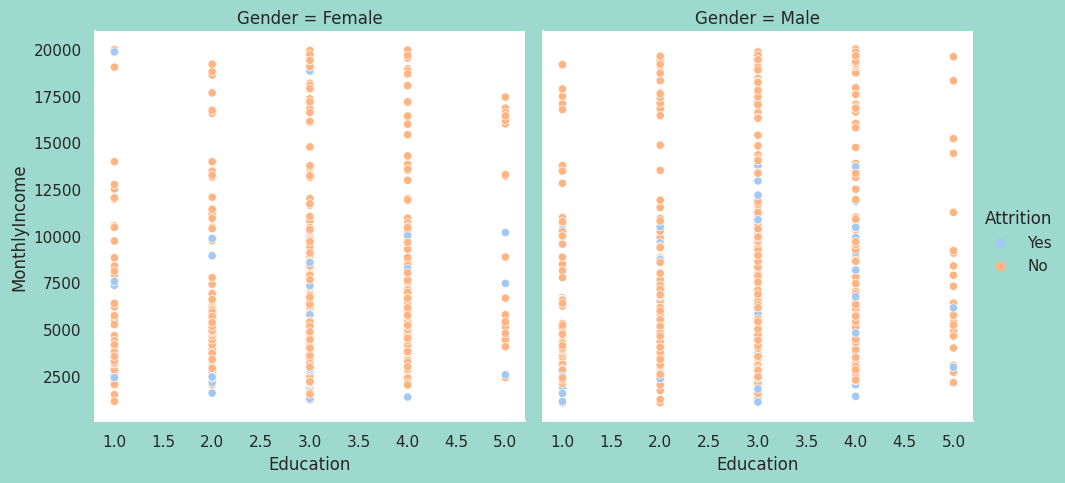

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Education", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

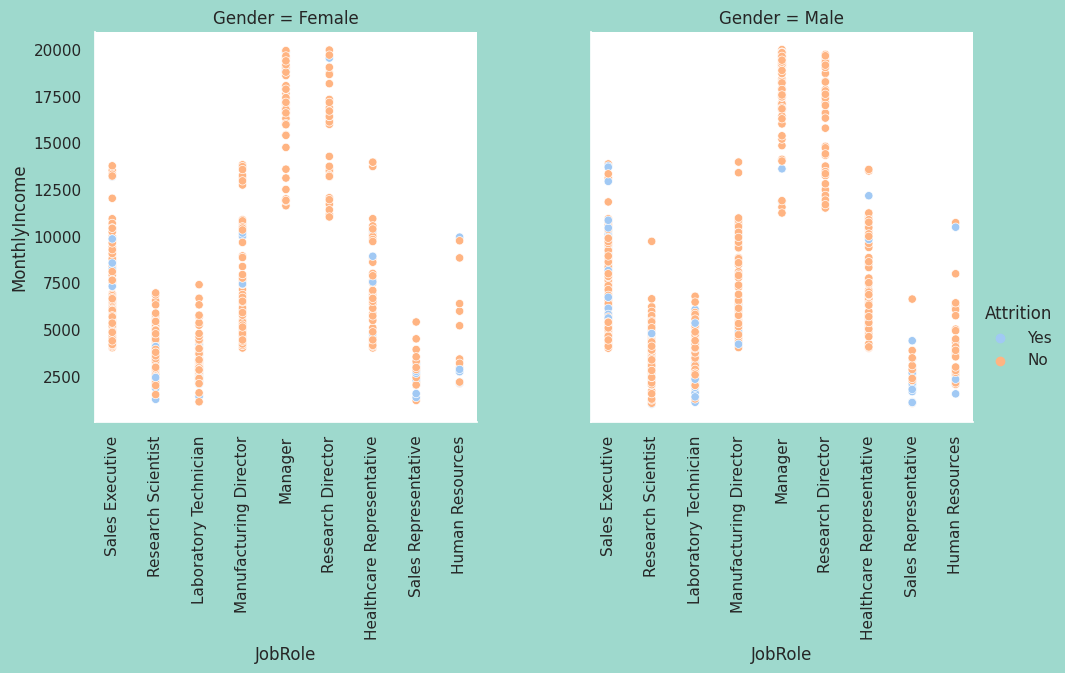

In [ ]:
plt.figure(figsize=(5,10))
ax=sns.relplot(data=df, y="MonthlyIncome", x="JobRole", hue="Attrition",col='Gender')
rotation = 90
for i, ax in enumerate(ax.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
#plt.xticks(rotation=90)
plt.show()

<Figure size 500x1000 with 0 Axes>

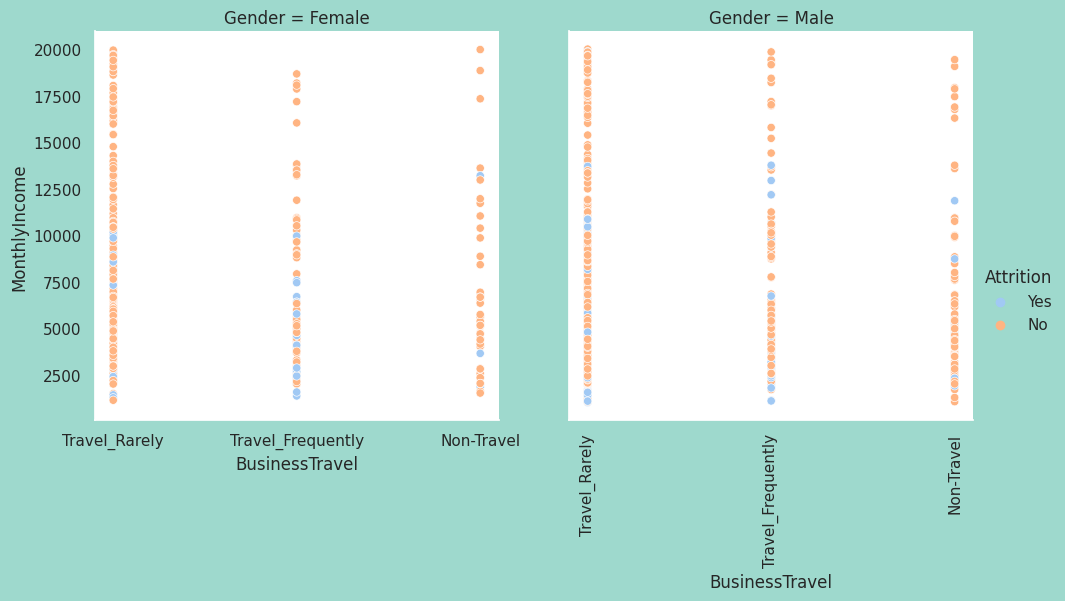

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="BusinessTravel", hue="Attrition",col='Gender')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_copy = df.copy()

In [ ]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_copy['Attrition']=label_encoder.fit_transform(df['Attrition'])
df_copy['OverTime']=label_encoder.fit_transform(df['OverTime'])
df_copy['Gender']=label_encoder.fit_transform(df['Gender'])

In [ ]:
#convert category attributes with more than 2 distinct values to numeric using one-hot vector
df_copy=pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField',
                               'JobRole', 'MaritalStatus'])

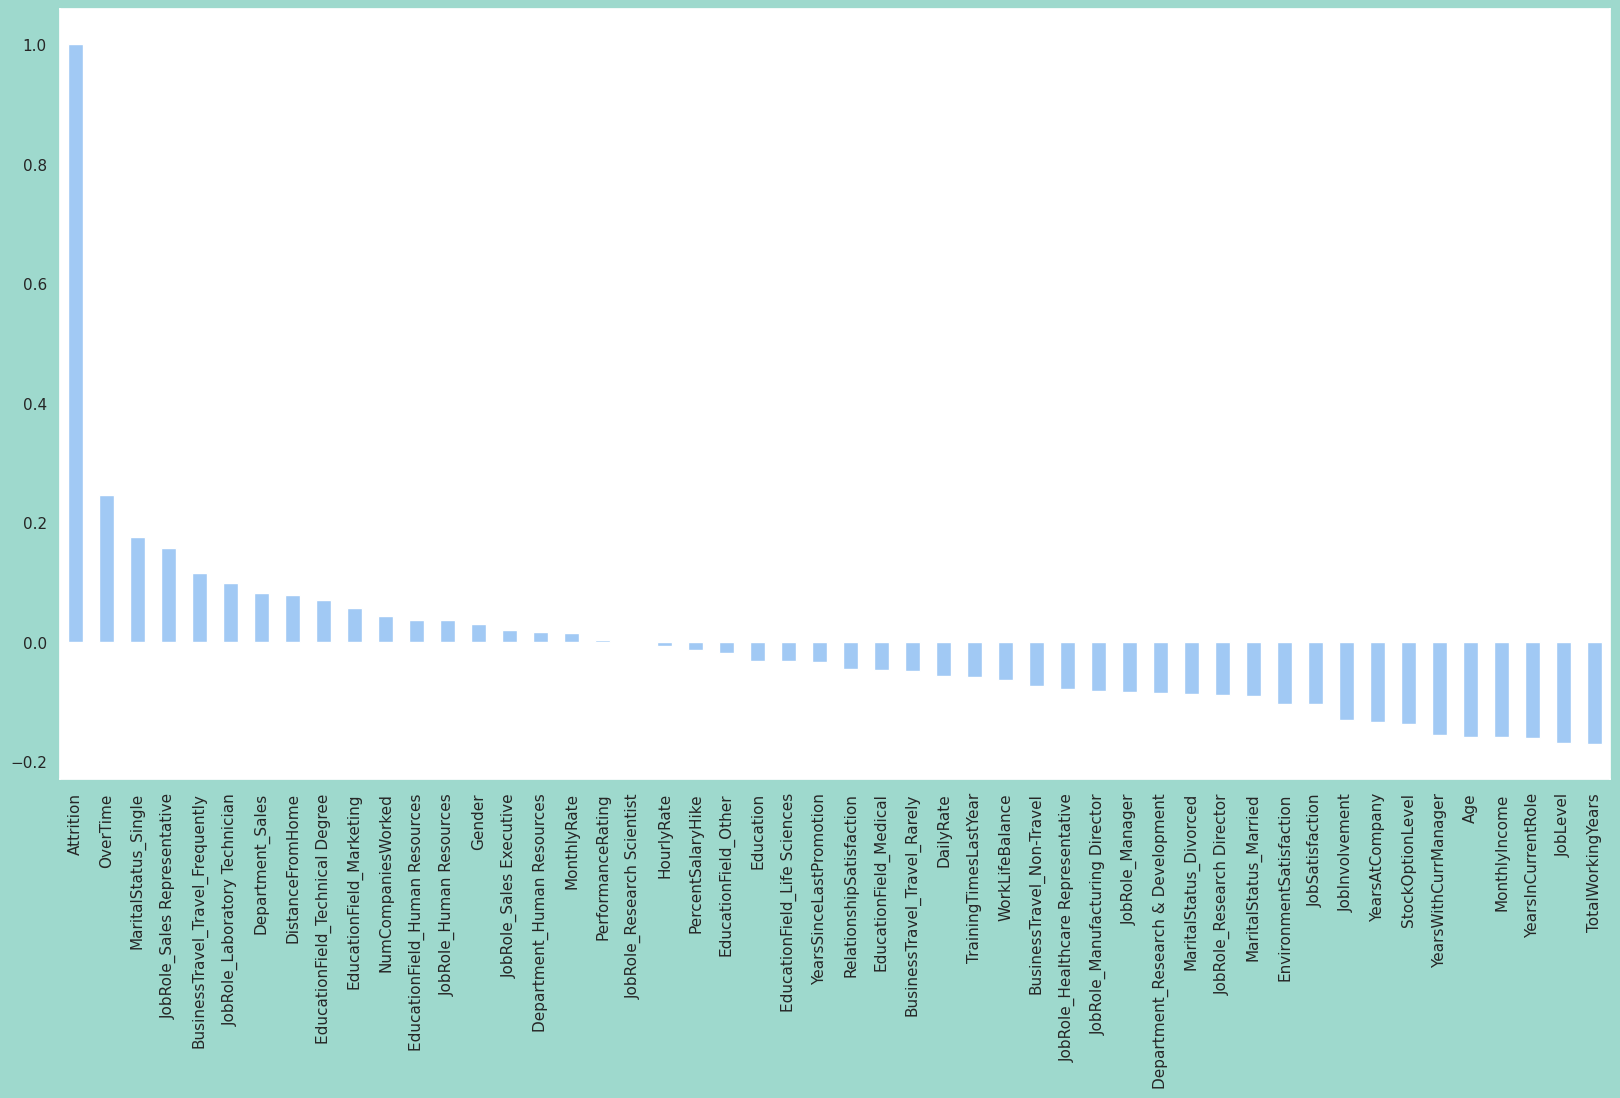

In [ ]:
plt.figure(figsize=(20,10))
correlations=df_copy.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

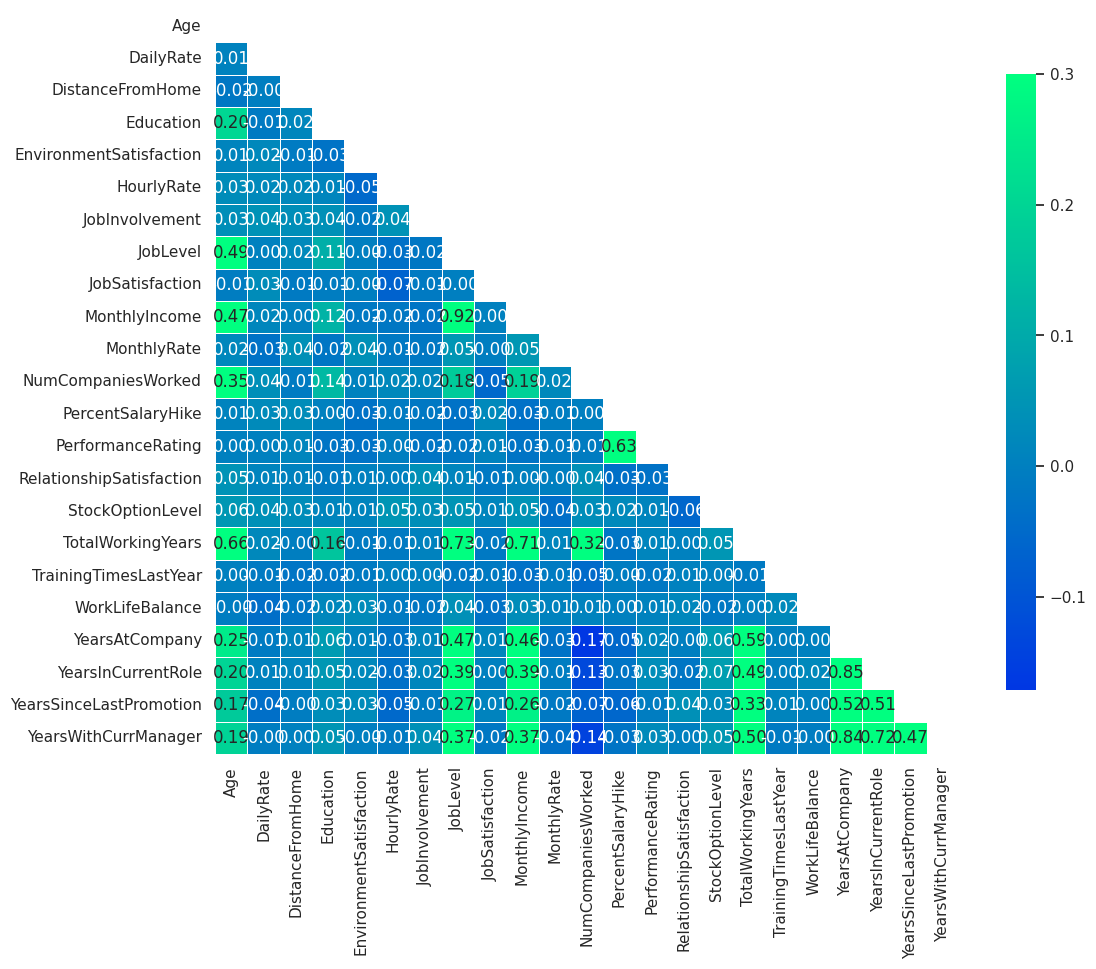

In [ ]:
df2_copy = df2.copy()
df2_copy = df2_copy.drop(['EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

corr = df2_copy.corr(method = "spearman")
sns.set(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10), dpi = 100)
sns.heatmap(corr, mask = mask, cmap= "winter", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot = True, fmt = ".2f")
plt.show()

In [ ]:
DF = df.copy()

In [ ]:
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Rarely',2)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Frequently',3)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Non-Travel',4)

DF['Attrition'] = DF['Attrition'].replace('Yes',2)
DF['Attrition'] = DF['Attrition'].replace('No',3)

DF['OverTime'] = DF['OverTime'].replace('Yes',2)
DF['OverTime'] = DF['OverTime'].replace('No',3)

DF['Gender'] = DF['Gender'].replace('Male',2)
DF['Gender'] = DF['Gender'].replace('Female',3)

DF['MaritalStatus'] = DF['MaritalStatus'].replace('Single',2)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Married',3)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Divorced',4)

DF['Department'] = DF['Department'].replace('Sales',2)
DF['Department'] = DF['Department'].replace('Human Resources',3)
DF['Department'] = DF['Department'].replace('Research & Development',4)

DF['EducationField'] = DF['EducationField'].replace('Life Sciences',2)
DF['EducationField'] = DF['EducationField'].replace('Medical',3)
DF['EducationField'] = DF['EducationField'].replace('Marketing',4)
DF['EducationField'] = DF['EducationField'].replace('Technical Degree',2)
DF['EducationField'] = DF['EducationField'].replace('Human Resources',3)
DF['EducationField'] = DF['EducationField'].replace('Other',4)

DF['JobRole'] = DF['JobRole'].replace('Sales Executive',2)
DF['JobRole'] = DF['JobRole'].replace('Manufacturing Director',3)
DF['JobRole'] = DF['JobRole'].replace('Healthcare Representative',4)
DF['JobRole'] = DF['JobRole'].replace('Manager',2)
DF['JobRole'] = DF['JobRole'].replace('Research Director',3)
DF['JobRole'] = DF['JobRole'].replace('Laboratory Technician',4)
DF['JobRole'] = DF['JobRole'].replace('Sales Representative',2)
DF['JobRole'] = DF['JobRole'].replace('Research Scientist',3)
DF['JobRole'] = DF['JobRole'].replace('Human Resources',4)

In [ ]:
DF = DF.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)

In [ ]:
DF

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          2               2       1102           2                 1   
1      49          3               3        279           4                 8   
2      37          2               2       1373           4                 2   
3      33          3               3       1392           4                 3   
4      27          3               2        591           4                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          3               3        884           4                23   
1466   39          3               2        613           4                 6   
1467   27          3               2        155           4                 4   
1468   49          3               3       1023           2                 2   
1469   34          3               2        628           4                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2               2                        2       3  ...   
1             1               2                        3       2  ...   
2             2               4                        4       2  ...   
3             4               2                        4       3  ...   
4             1               3                        1       2  ...   
...         ...             ...                      ...     ...  ...   
1465          2               3                        3       2  ...   
1466          1               3                        4       2  ...   
1467          3               2                        2       2  ...   
1468          3               3                        4       2  ...   
1469          3               3                        2       2  ...   

      NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                      8         2                 11                  3   
1                      1         3                 23                  4   
2                      6         2                 15                  3   
3                      1         2                 11                  3   
4                      9         3                 12                  3   
...                  ...       ...                ...                ...   
1465                   4         3                 17                  3   
1466                   4         3                 15                  3   
1467                   1         2                 20                  4   
1468                   2         3                 14                  3   
1469                   2         3                 12                  3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            1                 0                  8   
1                            4                 1                 10   
2                            2                 0                  7   
3                            3                 0                  8   
4                            4                 1                  6   
...                        ...               ...                ...   
1465                         3                 1                 17   
1466                         1                 1                  9   
1467                         2                 1                  6   
1468                         4                 0                 17   
1469                         1                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsSinceLastPromotion  
0                         0                1                        0  
1                         3                3                        1  
2                         3                3                        0  
3                         3                3                        3  
4                         3   

In [ ]:
#normalizing
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
DF1 = DF.drop(columns=['Attrition'])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=DF.columns)

In [ ]:
X = pd.DataFrame(norm_df.drop(columns='Attrition'))
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

In [ ]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 0)

In [ ]:
value_counts = df['Attrition'].value_counts()
print(value_counts)

No     1233
Yes     237
Name: Attrition, dtype: int64


In [ ]:
print('Inverse of Null Accuracy: ',237/(237+1233))
print('Null Accuracy: ',1233/(1233+237))

Inverse of Null Accuracy:  0.16122448979591836
Null Accuracy:  0.8387755102040816


In [ ]:
#SMOTE
from imblearn.over_sampling import RandomOverSampler
oversampler=RandomOverSampler(random_state=0)
smote_train, smote_target = oversampler.fit_resample(x_train,y_train)

In [ ]:
from collections import Counter
counter = Counter(smote_target)
print(counter)

Counter({1.0: 988, 0.0: 988})


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(smote_train, smote_target)
y_pred_lg = log_reg.predict(x_test)

In [ ]:
print ('accuracy',metrics.accuracy_score(y_test, y_pred_lg))

accuracy 0.7482993197278912


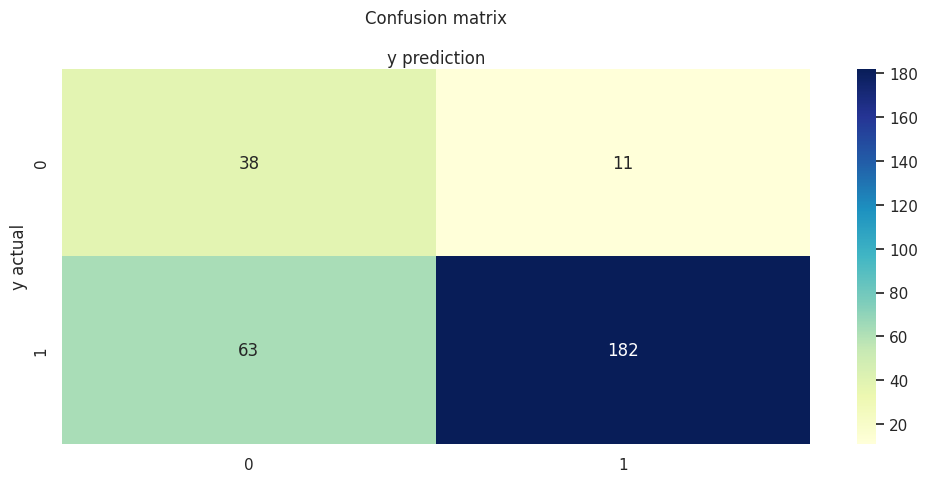

              precision    recall  f1-score   support

         0.0       0.38      0.78      0.51        49
         1.0       0.94      0.74      0.83       245

    accuracy                           0.75       294
   macro avg       0.66      0.76      0.67       294
weighted avg       0.85      0.75      0.78       294



In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred_lg)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_lg),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lg))

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train , smote_target)
y_pred = rfc.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred))

accuracy 0.9829931972789115


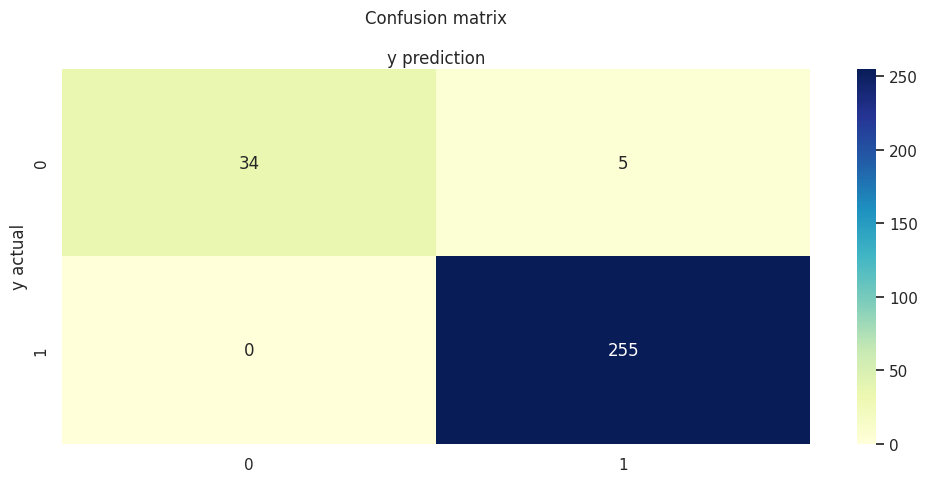

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        39
         1.0       0.98      1.00      0.99       255

    accuracy                           0.98       294
   macro avg       0.99      0.94      0.96       294
weighted avg       0.98      0.98      0.98       294



In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
seed=0
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0}

from sklearn.ensemble import  GradientBoostingClassifier

gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)
gb_predictions = gb.predict(x_test)
print('accuracy',metrics.accuracy_score(y_test, gb_predictions))

accuracy 0.9795918367346939


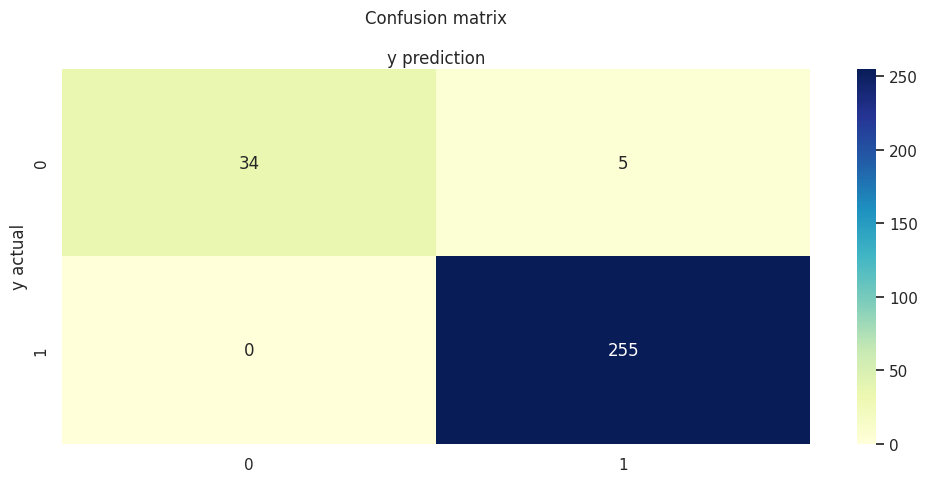

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92        39
         1.0       0.98      1.00      0.99       255

    accuracy                           0.98       294
   macro avg       0.98      0.93      0.95       294
weighted avg       0.98      0.98      0.98       294



In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(classification_report(y_test, gb_predictions))

In [ ]:
import matplotlib.cm as cm
colormap = cm.viridis
def rf_feat_importance(m, df):
    return pd.DataFrame({'Feature':df.columns, 'Importance':m.feature_importances_}).sort_values('Importance', ascending=False)
fi = rf_feat_importance(gb, X)
fi[:10].style.background_gradient(cmap=colormap)

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
def rf_feat_importance(m, df):
    return pd.DataFrame({'Feature':df.columns, 'Importance':m.feature_importances_}).sort_values('Importance', ascending=False)
fi = rf_feat_importance(gb, X)
fi[:10].style.background_gradient(cmap='Blues')

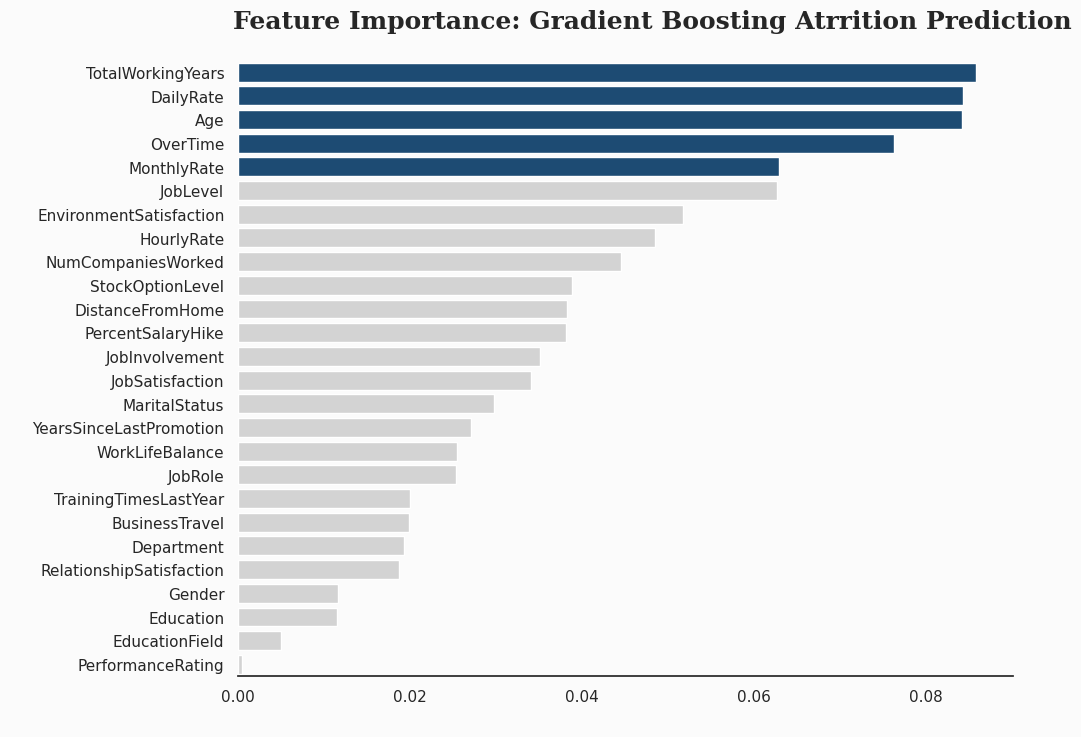

In [ ]:
background_color = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 8),facecolor=background_color)

color_map = ['lightgray' for _ in range(26)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] = color_map[4] = '#0f4c81' # color highlight

sns.barplot(data=fi,x='Importance',y='Feature',ax=ax,palette=color_map)
ax.set_facecolor(background_color)
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
fig.text(0.12,0.92,"Feature Importance: Gradient Boosting Atrrition Prediction", fontsize=18, fontweight='bold', fontfamily='serif')


plt.xlabel(" ", fontsize=12, fontweight='light', fontfamily='serif',y=-1.5)
plt.ylabel(" ", fontsize=12, fontweight='light', fontfamily='serif')
plt.show()

In [ ]:
!pip install shap
import shap
shap.initjs()
explainer = shap.Explainer(gb)
shap_values = explainer.shap_values(x_test)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.3 MB/s eta 0:00:00


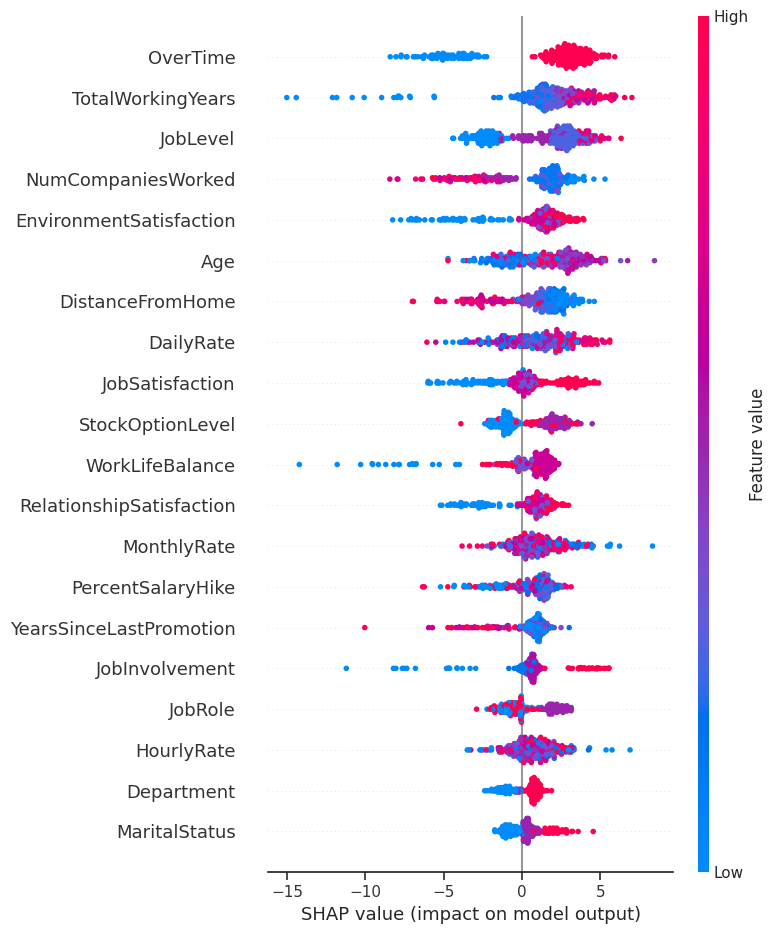

In [ ]:
shap.summary_plot(shap_values, x_test,alpha=1.0)

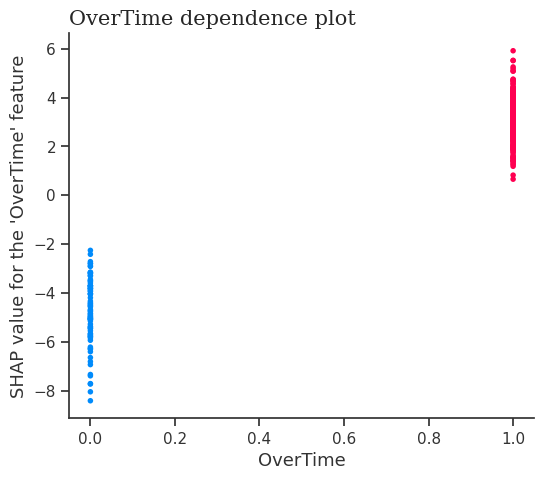

In [ ]:
shap.dependence_plot('OverTime', shap_values, x_test, interaction_index="OverTime",alpha=1.0,show=False)
plt.title("OverTime dependence plot",loc='left',fontfamily='serif',fontsize=15)
plt.ylabel("SHAP value for the 'OverTime' feature")
plt.show()

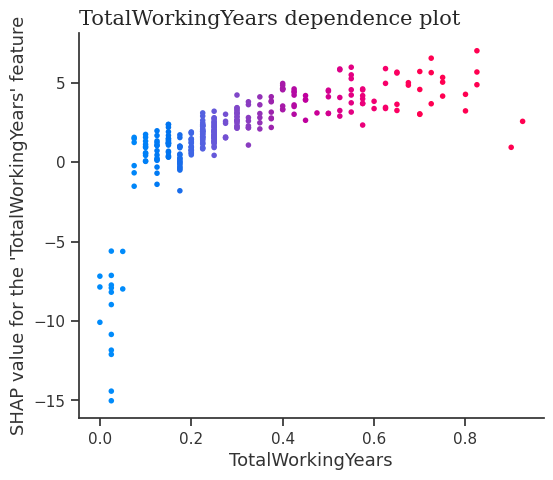

In [ ]:
shap.dependence_plot('TotalWorkingYears', shap_values, x_test, interaction_index="TotalWorkingYears",alpha=1.0,show=False)
plt.title("TotalWorkingYears dependence plot",loc='left',fontfamily='serif',fontsize=15)
plt.ylabel("SHAP value for the 'TotalWorkingYears' feature")
plt.show()

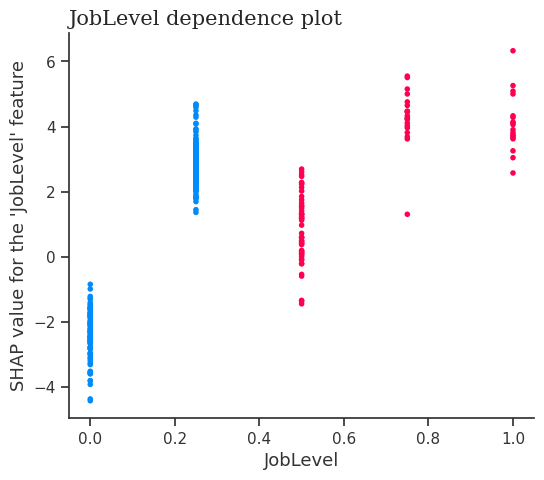

In [ ]:
shap.dependence_plot('JobLevel', shap_values, x_test, interaction_index="JobLevel",alpha=1.0,show=False)
plt.title("JobLevel dependence plot",loc='left',fontfamily='serif',fontsize=15)
plt.ylabel("SHAP value for the 'JobLevel' feature")
plt.show()

In [ ]:
#shap_values_1

In [ ]:
#shap_values_1 = explainer.shap_values(x_test.iloc[[0]])
#shap.plots.waterfall(shap_values_1[[0]])

In [ ]:
#shap.plots.bar(shap_values)

In [ ]:
#from shap import Explainer, Explanation
#for i in range(len(x_test)):
 #   shap.plots.waterfall(shap_values[1], max_display=10)

In [ ]:
!pip install lime
import lime
import lime.lime_tabular

# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X.values, feature_names=X.columns.values.tolist(),
                                                  class_names=['Attrition'], verbose=True, mode='classification')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=302b731be1aa0ab2d3b5b02611eecc7471cd8109905384866379a54474a56f38
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Choose the jth instance and use it to predict the results for that selection
j = 1
exp = explainer.explain_instance(X.values[j], gb.predict_proba, num_features=5)

NameError: name 'explainer' is not defined

In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
gb_predictions

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1.

In [ ]:
j = 2
exp = explainer.explain_instance(X.values[j], gb.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True)

Intercept 1.0170056112760093
Prediction_local [0.64033282]
Right: 0.9998192832065751


In [ ]:
column_names = X.columns
column_names

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion'],
      dtype='object')

In [ ]:
!pip install eli5
import eli5

columns_ = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion']

eli5.show_weights(gb, feature_names=columns_)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=e2b513b97c9a5c7fd2a9b7658eeb9e4eccd09e2e1ffca3aaf305001e89057406
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
!pip install shapash
from shapash import SmartExplainer
xpl = SmartExplainer(
    model=gb # Optional: compile step can use inverse_transform method # Optional parameter, dict specifies label for features name
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.1/655.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 41.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 28.0 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013920 sha256=d36a2fc6879cd4fe4999b66270a4df4344b15c4a7bc94fe3fd91672f70831704
  Stored in directory: /root/.cache/pip/wheels/6c/04/c8/22a0b5a26c3ecb61e17a27d4bbe7fad32d1417bbdbd4d46acf
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl si

In [ ]:

y_pred = pd.DataFrame(gb.predict(x_test),columns=['pred'],index=x_test.index)



In [ ]:
y_test

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
xpl.compile(x=x_test,
 y_pred=y_pred,
 #y_target=y_test, # Optional: allows to display True Values vs Predicted Values
 )

In [ ]:
xpl.plot.features_importance()

In [ ]:
xpl.plot.contribution_plot("DailyRate")

In [ ]:
xpl.plot.contribution_plot("OverTime")

In [ ]:
xpl.plot.local_plot(index=560)

In [ ]:
summary_df= xpl.to_pandas(
    max_contrib=3, # Number Max of features to show in summary
    threshold=5000,
)
summary_df.head()

pred
1041   1.0
184    1.0
1222   0.0
67     1.0
220    1.0

In [ ]:
predictor = xpl.to_smartpredictor()
predictor.save('./predictor.pkl')

In [ ]:
from shapash.utils.load_smartpredictor import load_smartpredictor
predictor_load = load_smartpredictor('./predictor.pkl')

In [ ]:
predictor_load.add_input(x=X, ypred=Y)
detailed_contributions = predictor_load.detail_contributions()
detailed_contributions.head()
